### In case of positive hydrostatic strain i.e $\text{tr}(\boldsymbol{\epsilon})\geq 0$
$\langle p \rangle_+ = p = \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}: \mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$    and      $\langle p \rangle_- = 0 $

$\mathbb{C}_{mod} = \mathbb{C}_{+} = s^2\left(\mathbb{I}_{vol}\mathbb{C} + \mathbb{I}_{dev}\mathbb{C}\right) = s^2 \mathbb{C}$

### In case of negative hydrostatic strain $\text{tr}(\boldsymbol{\epsilon})< 0$
$\langle p \rangle_+ = 0 $   and    $\langle p \rangle_- = p =  \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}:\mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$

$\mathbb{C}_{mod} = \mathbb{C}_{-} = s^2\bigl(\mathbb{I}_{dev}\mathbb{C}\bigr) + \mathbb{I}_{vol}\mathbb{C}$

 ## Strong Form in terms of $\mathbb{C}_{mod}$ and $\mathcal{H}(\mathcal{E})$
 
 $\nabla \cdot \boldsymbol{\sigma} = {\bf{0}}$
 
 $ \nabla \cdot \biggl(G_cl\boldsymbol{A}\nabla s\biggr) - 2s\mathcal{H}(\mathcal{E})  + \frac{G_c}{l}\left(1-s\right) = 0$
 
 $ \nabla \cdot \biggl(\boldsymbol{\kappa} \nabla \mathcal{T} \biggr) - \rho c \dot{T} = 0 $ 

where 

$\boldsymbol{\sigma} = \mathbb{C}_{mod} \left(\boldsymbol{\epsilon} - \alpha (\mathcal{T}- \mathcal{T}_0)\right) $



$\mathcal{E}  = \frac{1}{2}\biggl(\langle p \rangle_+\boldsymbol{I}:\mathbb{I}_{vol}\boldsymbol{\epsilon} + \mathbb{I}_{dev}\mathbb{C}\boldsymbol{\epsilon}:\mathbb{I}_{dev}\boldsymbol{\epsilon}\biggr) $

$\mathcal{H}(f) = \text{max}_{\tau \in [0,t]}f(\tau)$

 # Weak Form

### For Mechanical part

 $a(\boldsymbol{u}, {\boldsymbol{v}}) = \int_{\Omega} \bigl( \mathbb{C}_{mod}\mathbb{\epsilon}: \nabla \boldsymbol{v} \bigr)d\Omega  $

### For phase-field part
 
 $ a(s,\phi) = \int_{\Omega}\bigl(G_cl\nabla s \cdot \nabla \phi + 2s \phi\mathcal{H}({\mathcal{E}}) +  \frac{G_c}{l} s \phi\bigr)d\Omega$

 $ l(\phi) = \int_{\Omega}\frac{G_c}{l}\phi d{\Omega}$

### For temperature part

$ a(w,\mathcal{T}) = \int_{\Omega} \bigl(\nabla w \bigr) \cdot \bigl(\boldsymbol{\kappa} \nabla \mathcal{T} \bigr) d{\Omega} + \int w\rho c \dot{T}$

$l (w) = 0$

In [1]:
using GridapGmsh
using Gridap
using Gridap.Geometry
using Gridap.TensorValues
using Plots
include(raw"E:\Softwares\gmsh-4.8.3-Windows64-sdk\lib\gmsh.jl")

Main.gmsh

In [2]:
const T0 = 880
const TAppMax = 300
const TAppMin = 300
const delt = 1e-8
const tMax = 1e-6
const uMax = 1.2e-6
AppVel = uMax/tMax
uMin = 0
uTran = 1*uMax

1.2e-6

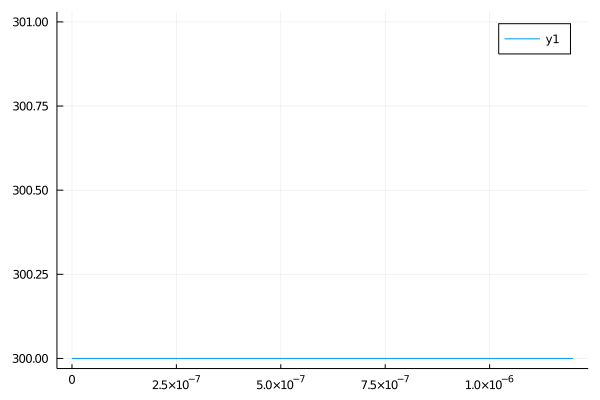

In [3]:
function Tfun(u)  
    if u <= uTran
      return ((TAppMax - TAppMin)/uTran)*u + TAppMin
    else
     return  TAppMax
    end
end 
plot(Tfun,0,uMax)

In [4]:
uAppVec = range(0,uMax,length = Int64(floor(tMax/delt)))

0.0:1.2121212121212122e-8:1.2e-6

In [5]:
TAppVec = Tfun.(uAppVec)

100-element Vector{Float64}:
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
   ⋮
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0
 300.0

## Definitions of Tensorial Quantities:

$\boldsymbol{I} = \delta_{ij} \boldsymbol{e}_i\otimes\boldsymbol{e}_j$

$\mathbb{I} = \boldsymbol{I}\otimes\boldsymbol{I}$

$\mathbb{I}_{sym} = \frac{1}{2}\biggl(\mathbb{I}+\mathbb{I}^T\biggr)$

$\mathbb{I}_{skw} = \frac{1}{2}\biggl(\mathbb{I}-\mathbb{I}^T\biggr)$

$\mathbb{I}_{vol} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)$

$\mathbb{I}_{dev} = \mathbb{I}_{sym} - \mathbb{I}_{vol}$

$\boldsymbol{\epsilon}_{vol} = \frac{1}{3}\text{tr}(\boldsymbol{\epsilon}) \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\epsilon}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\epsilon} = \mathbb{I}_{vol} \boldsymbol{\epsilon} $

$\boldsymbol{\epsilon}_{dev} = \boldsymbol{\epsilon} - \boldsymbol{\epsilon}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\epsilon} = \mathbb{I}_{dev} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{vol} = p \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\sigma}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\sigma} = \mathbb{I}_{vol} \boldsymbol{\sigma} = \mathbb{I}_{vol}\mathbb{C} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{dev} = \boldsymbol{\sigma} - \boldsymbol{\sigma}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\sigma} = \mathbb{I}_{dev} \boldsymbol{\sigma}=\mathbb{I}_{dev} \mathbb{C} \boldsymbol{\epsilon}$

In [6]:
I2 = SymTensorValue{2,Float64}(1.0,0.0,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/3)*I4
I4_dev = I4_sym - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.6666666666666667, 0.0, -0.3333333333333333, 0.0, 0.5, 0.0, -0.3333333333333333, 0.0, 0.6666666666666667)

In [7]:
const L = 25e-3
const B = 4.9e-3
const lsp = (2*L)/250
const hf = lsp/5
const h = lsp/2
#const h = 30*hf

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.geo.addPoint(0.0, B, 0.0, h, 1)  
gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h, 2) 
gmsh.model.geo.addPoint(L, 0.0, 0.0,h, 3) 
gmsh.model.geo.addPoint(L, 0.3*B, 0.0, h, 4)
gmsh.model.geo.addPoint(L, B, 0.0, h, 5)
gmsh.model.geo.addPoint(0.3*L, B, 0.0, h, 6)
gmsh.model.geo.addPoint(0.3*L, 0.3*B, 0.0, h, 7)

gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 5, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 1, 6)
gmsh.model.geo.addLine(6, 7, 7)
gmsh.model.geo.addLine(7, 4, 8)

gmsh.model.geo.addCurveLoop([1,2,3,4,5,6],1)


gmsh.model.geo.addCurveLoop([7,8,4,5],11)
gmsh.model.geo.addPlaneSurface([11], 11)
gmsh.model.geo.addPlaneSurface([1,-11], 1)

gmsh.model.addPhysicalGroup(2, [1,11],1)
gmsh.model.addPhysicalGroup(1, [3,4],1)
gmsh.model.addPhysicalGroup(1, [6,5],2)
gmsh.model.addPhysicalGroup(1, [1,2],3)
gmsh.model.setPhysicalName(2, 1, "Domain")
gmsh.model.setPhysicalName(1, 1, "VerticalSupport")
gmsh.model.setPhysicalName(1, 2, "HorizontalSupport")
gmsh.model.setPhysicalName(1, 3, "TempBoundary")

gmsh.model.mesh.field.add("Distance", 1)
gmsh.model.mesh.field.setNumbers(1, "CurvesList", [6,1,2,3,8,7])

gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "InField", 1)
gmsh.model.mesh.field.setNumber(2, "SizeMin", hf)
gmsh.model.mesh.field.setNumber(2, "SizeMax", h)
gmsh.model.mesh.field.setNumber(2, "DistMin", 0.2*B)
gmsh.model.mesh.field.setNumber(2, "DistMax", 0.4*B)

gmsh.model.mesh.field.setAsBackgroundMesh(2)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("Quenching.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.00458336s, CPU 0s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 50%] Meshing surface 11 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 2.65026s, CPU 2.625s)
Info    : 70107 nodes 140743 elements
Info    : Writing 'Quenching.msh'...
Info    : Done writing 'Quenching.msh'


In [8]:
model = GmshDiscreteModel("Quenching.msh")
writevtk(model,"Quenching")

Info    : Reading 'Quenching.msh'...
Info    : 17 entities
Info    : 70107 nodes
Info    : 140212 elements
Info    : Done reading 'Quenching.msh'


3-element Vector{Vector{String}}:
 ["Quenching_0.vtu"]
 ["Quenching_1.vtu"]
 ["Quenching_2.vtu"]

In [9]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

138991-element Vector{Int8}:
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 ⋮
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4

In [10]:
const Mat_tag = get_tag_from_name(labels,"Domain")

4

### Elastic Properties from (A phase-field model of thermo-elastic coupled brittle fracture with
### explicit time integration)

In [11]:
const E_mat = 340e9
const ν_mat = 0.22

0.22

#### Input fracture parameters

In [12]:
const Gc = 42.47
const η = 1e-8

1.0e-8

#### Input Thermal parameter 

In [13]:
const α = 8.0e-6
const c = 0.775
const κ_mat = 300.0
const ρ = 2450.0

2450.0

## COnstitutive Matrices

### Elastic stiffness tensor

In [14]:
function ElasFourthOrderConstTensor(E ,ν , PlanarState)
# 1 for Plane Stress and 2 Plane Strain Condition
if PlanarState == 1
C1111 = E /(1 -ν *ν )
C1122 = (ν *E ) /(1 -ν *ν )
C1112 = 0.0
C2222 = E /(1 -ν *ν )
C2212 = 0.0
C1212 = E /(2*(1+ν ) )
elseif PlanarState == 2
C1111 = (E *(1 -ν *ν ) ) /((1+ν ) *(1 -ν -2*ν *ν ) )
C1122 = (ν *E ) /(1 -ν -2*ν *ν )
C1112 = 0.0
C2222 = (E *(1 -ν ) ) /(1 -ν -2*ν *ν )
C2212 = 0.0
C1212 = E /(2*(1+ν ) )
end
C_ten = SymFourthOrderTensorValue(C1111 , C1112 , C1122 , C1112 ,
C1212 , C2212 , C1122 , C2212 , C2222)
return C_ten
end

ElasFourthOrderConstTensor (generic function with 1 method)

In [15]:
const C_mat = ElasFourthOrderConstTensor(E_mat,ν_mat,1)

SymFourthOrderTensorValue{2, Float64, 9}(3.572929802437999e11, 0.0, 7.860445565363599e10, 0.0, 1.3934426229508197e11, 0.0, 7.860445565363599e10, 0.0, 3.572929802437999e11)

## Computation of temperature field

In [16]:
κGradTemp(∇,s_in) = κ_mat*∇

κGradTemp (generic function with 1 method)

## Stress

$\sigma_{elas}(\epsilon(\boldsymbol{u}),T) =  \mathbb{C}\,\left(\boldsymbol{\epsilon} - \boldsymbol{\alpha}(T-T_0)\right)  $

$\sigma_{elasMod}(\epsilon(\boldsymbol{u}),s,T) =  \mathbb{C}_{mod}\,\left(\boldsymbol{\epsilon} - \boldsymbol{\alpha}(T-T_0)\right)$

$\sigma_{piezo}(\boldsymbol{E}(\phi)) = - \mathbb{e}^T\,\boldsymbol{E}$

or, $\sigma_{piezo}(\nabla\phi) =  \mathbb{e}^T\,\boldsymbol{\nabla}\phi$

$\sigma_{piezoMod}(\nabla\phi,s) =  \mathbb{e}_{mod}^T\,\boldsymbol{\nabla}\phi$

$ \sigma_{therm} = \boldsymbol{\lambda}\bigl(T-T_0)  $ (Ref: Crack interaction paper)

In [17]:
σ_elas(εElas) = C_mat ⊙ εElas

σ_elas (generic function with 1 method)

In [18]:
function σ_elasMod(ε, ε_in, s_in,T,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElas = ε - α*(T-T0)*I2
    
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElas) + I4_vol⊙ σ_elas(εElas) 
  end  
    return σ
end

σ_elasMod (generic function with 1 method)

In [19]:
function σ_totMod(ε, ε_in,s_in,T,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTot = ε - α*T*I2
    
 if tr(εElas_in)  >= 0
      σT = (s_in^2 + η)*σ_elas(εElasTot)
  elseif tr(εElas_in) < 0
      σT = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElasTot) + I4_vol⊙ σ_elas(εElasTot) 
  end  
    return σT
end

σ_totMod (generic function with 1 method)

In [20]:
function σ_thermMod(ε_in,s_in,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTher = α*(T0)*I2
    
 if tr(εElas_in)  >= 0
      σF = (s_in^2 + η)*σ_elas(εElasTher)
  elseif tr(εElas_in) < 0
      σF = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElasTher) + I4_vol⊙ σ_elas(εElasTher) 
  end  
    return σF
end

σ_thermMod (generic function with 1 method)

In [21]:
function ψPos(ε_in,T_in)
    εElas_in = ε_in - α*(T_in-T0)*I2
 if tr(εElas_in)  >= 0
      ψPlus = 0.5*((εElas_in) ⊙ σ_elas(εElas_in))             
  elseif tr(εElas_in)  < 0
      ψPlus = 0.5*((I4_dev ⊙ σ_elas(εElas_in)) ⊙ (I4_dev ⊙ (εElas_in))) 
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [22]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [23]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = Gridap.solve(op)
  qh
end

project (generic function with 1 method)

In [24]:
order = 1
degree = 2*order

2

In [25]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [26]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 138991
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 1524828954402334558

In [27]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["VerticalSupport","HorizontalSupport"],
          dirichlet_masks=[(true,false),(false,true)])
uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 138991
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 1524828954402334558

In [28]:
reffe_Temp = ReferenceFE(lagrangian,Float64,order)
V0_Temp = TestFESpace(model,reffe_Temp;
  conformity=:H1,
  dirichlet_tags=["TempBoundary"])

UnconstrainedFESpace()

In [29]:
V0 = MultiFieldFESpace([V0_Disp,V0_Temp])

MultiFieldFESpace()

In [30]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ  + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = Gridap.solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [31]:
 function   stepDispTemp(uh_in,sh_in,T_in,vApp,TApp,delt)
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,0.0)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2])
        Tapp1(x) = TApp
        Tg = TrialFESpace(V0_Temp,[Tapp1])
        U = MultiFieldFESpace([U_Disp,Tg])
        a((u,T),(v,w)) = ∫( (ε(v) ⊙ (σ_totMod∘(ε(u),ε(uh_in),sh_in,T,T_in))) + ∇(w)⋅(κGradTemp∘ (∇(T),sh_in)) + ((ρ*c*T*w)/delt))*dΩ
        b((v,w)) = ∫(((ρ*c*T_in*w)/delt) - (ε(v) ⊙ (σ_thermMod∘(ε(uh_in),sh_in,T_in))))*dΩ
        op = AffineFEOperator(a,b,U,V0)
        uhTh = Gridap.solve(op)                
        uh_out,Th_out =  uhTh
    
    return uh_out,Th_out
end

stepDispTemp (generic function with 1 method)

In [32]:
cd("ResultsDataFracThermoSingleEdgedPlate+0")

LoadError: IOError: cd("ResultsDataFracThermoSingleEdgedPlate+0"): no such file or directory (ENOENT)

In [33]:
t = 0.0
innerMax = 10
count = 0
tol = 1e-8

Load = Float64[]
Displacement = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)

ψPlusPrev = CellState(0.0,dΩ) 
sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ThPrev = CellState(T0,dΩ)
Th = project(ThPrev,model,dΩ,order)
while t .< tMax 
    count = count .+ 1      
    t = t + delt
    vApp = AppVel*t    
    TApp = TAppVec[count]

    print("\n Entering time step$count :", float(t))
    
   for inner = 1:innerMax   
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error$count = ",float(RelErr))
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,Th = stepDispTemp(uh,sh,Th,vApp,TApp,delt)

        ψhPos_in = ψPos∘(ε(uh),Th)   
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
  
        if RelErr < tol
            break 
        end      
    end
    
    #Node_Force = sum(∫( n_Γ_Load ⋅ (σ_elasMod∘(ε(uh),ε(uh),sh,Th,Th)) ) *dΓ_Load) 
    
    #push!(Load, Node_Force[2])     
    #push!(Displacement, vApp)           
    if mod(count,5) == 0
         writevtk(Ω,"results_PhaseFieldThermoElastic$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"epsi"=>ε(uh),"T"=>Th])
    end
end


 Entering time step1 :1.0e-8
 Relative error1 = 6.697574089834737e-17
 Entering time step2 :2.0e-8
 Relative error2 = 0.1894668749307481
 Relative error2 = 0.009654690685681479
 Relative error2 = 0.005703006364479006
 Relative error2 = 0.00450110312689863
 Relative error2 = 0.00386833739395546
 Relative error2 = 0.0034673964514163437
 Relative error2 = 0.0031834773057718307
 Relative error2 = 0.0029681143575249164
 Relative error2 = 0.0027973836491215873
 Relative error2 = 0.002658322091007661
 Entering time step3 :3.0000000000000004e-8
 Relative error3 = 0.0025432080367374862
 Relative error3 = 0.0024472402175845596
 Relative error3 = 0.002367561034632669
 Relative error3 = 0.0023015957701437374
 Relative error3 = 0.0022477826362226837
 Relative error3 = 0.002205368476186668
 Relative error3 = 0.0021732210024398976
 Relative error3 = 0.0021461078231873594
 Relative error3 = 0.002119325175806107
 Relative error3 = 0.0020898642905045023
 Entering time step4 :4.0e-8
 Relative error4 = 0

 Relative error19 = 0.0003278891257792091
 Relative error19 = 0.00032616241401951557
 Entering time step20 :2.0000000000000007e-7
 Relative error20 = 0.0003244688031594797
 Relative error20 = 0.00032285209319800464
 Relative error20 = 0.0003213256822465223
 Relative error20 = 0.00031986763980826674
 Relative error20 = 0.00031846256010003893
 Relative error20 = 0.00031718319078130917
 Relative error20 = 0.0003159327386507213
 Relative error20 = 0.0003147327666247964
 Relative error20 = 0.0003135980391862846
 Relative error20 = 0.00031257015137453083
 Entering time step21 :2.1000000000000008e-7
 Relative error21 = 0.0003115928091311609
 Relative error21 = 0.0003105357926186968
 Relative error21 = 0.0003093737515815494
 Relative error21 = 0.00030815761080778416
 Relative error21 = 0.00030690473880457485
 Relative error21 = 0.00030559323350898195
 Relative error21 = 0.0003041939986939429
 Relative error21 = 0.0003027912246308742
 Relative error21 = 0.00030144005148855234
 Relative error21 

 Relative error37 = 0.00018868435713698174
 Relative error37 = 0.00018813476742976558
 Relative error37 = 0.00018749649877872993
 Relative error37 = 0.0001867596003130051
 Relative error37 = 0.00018592065137000292
 Relative error37 = 0.00018499193985045058
 Relative error37 = 0.0001839988143489056
 Relative error37 = 0.00018294693431359532
 Entering time step38 :3.800000000000002e-7
 Relative error38 = 0.0001818656194239321
 Relative error38 = 0.0001807672021767833
 Relative error38 = 0.00017970870736211145
 Relative error38 = 0.00017874202653013274
 Relative error38 = 0.00017785283507756088
 Relative error38 = 0.00017701897194979135
 Relative error38 = 0.0001762444413644177
 Relative error38 = 0.00017553453581287172
 Relative error38 = 0.00017489885892827772
 Relative error38 = 0.00017432558190253025
 Entering time step39 :3.9000000000000024e-7
 Relative error39 = 0.00017379516079032978
 Relative error39 = 0.00017326858192308475
 Relative error39 = 0.00017273767806256997
 Relative err

 Relative error54 = 0.00012687238023738375
 Relative error54 = 0.00012677860746767246
 Relative error54 = 0.00012658104799288087
 Relative error54 = 0.00012627383630007947
 Entering time step55 :5.500000000000003e-7
 Relative error55 = 0.00012586325723108562
 Relative error55 = 0.00012535963841268314
 Relative error55 = 0.00012480166606859187
 Relative error55 = 0.00012421827476485187
 Relative error55 = 0.00012363214162732116
 Relative error55 = 0.00012308460745217195
 Relative error55 = 0.00012259443128942452
 Relative error55 = 0.00012215970153254545
 Relative error55 = 0.00012178489100666355
 Relative error55 = 0.00012146981007628621
 Entering time step56 :5.600000000000004e-7
 Relative error56 = 0.00012120400228199703
 Relative error56 = 0.00012098041247719713
 Relative error56 = 0.0001208068503415722
 Relative error56 = 0.00012067307099669511
 Relative error56 = 0.00012055736366132195
 Relative error56 = 0.00012044493699477548
 Relative error56 = 0.00012034628460971446
 Relative 

 Relative error72 = 9.102937123215747e-5
 Relative error72 = 9.077235299202587e-5
 Relative error72 = 9.052049917702134e-5
 Relative error72 = 9.027453973351828e-5
 Relative error72 = 9.003413395131502e-5
 Relative error72 = 8.980638643841167e-5
 Relative error72 = 8.958669547993682e-5
 Relative error72 = 8.938006451835633e-5
 Relative error72 = 8.918846944257806e-5
 Entering time step73 :7.300000000000005e-7
 Relative error73 = 8.900571570536184e-5
 Relative error73 = 8.882753522052602e-5
 Relative error73 = 8.865506451994606e-5
 Relative error73 = 8.848241613161462e-5
 Relative error73 = 8.83176846529397e-5
 Relative error73 = 8.817446109429016e-5
 Relative error73 = 8.80662396769741e-5
 Relative error73 = 8.799607477682518e-5
 Relative error73 = 8.794604520633594e-5
 Relative error73 = 8.790418735930224e-5
 Entering time step74 :7.400000000000005e-7
 Relative error74 = 8.785723011950836e-5
 Relative error74 = 8.780362539028849e-5
 Relative error74 = 8.774418895169521e-5
 Relative er

 Relative error90 = 6.565328620385458e-5
 Relative error90 = 6.557180121736384e-5
 Relative error90 = 6.54894609580243e-5
 Relative error90 = 6.540564256011005e-5
 Relative error90 = 6.532179996352337e-5
 Relative error90 = 6.523808783368272e-5
 Relative error90 = 6.515295950035391e-5
 Relative error90 = 6.506866189287751e-5
 Entering time step91 :9.100000000000007e-7
 Relative error91 = 6.498545239682619e-5
 Relative error91 = 6.490346063340737e-5
 Relative error91 = 6.482531915435285e-5
 Relative error91 = 6.475290231962339e-5
 Relative error91 = 6.468412194565639e-5
 Relative error91 = 6.46155987590253e-5
 Relative error91 = 6.454415163382546e-5
 Relative error91 = 6.44694222295441e-5
 Relative error91 = 6.438967377948336e-5
 Relative error91 = 6.430413161195832e-5
 Entering time step92 :9.200000000000007e-7
 Relative error92 = 6.421397640319644e-5
 Relative error92 = 6.412172045273819e-5
 Relative error92 = 6.402627494165665e-5
 Relative error92 = 6.392943159379212e-5
 Relative err

In [34]:
writevtk(Ω,"results_PhaseFieldThermoElastic$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"epsi"=>ε(uh),"T"=>Th])

(["results_PhaseFieldThermoElastic100.vtu"],)

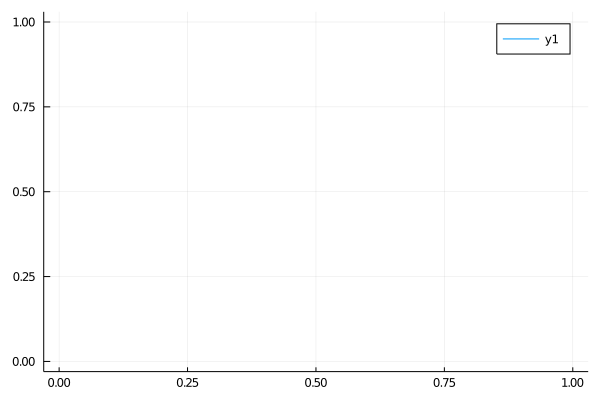

In [35]:
plot(Displacement*1e6,Load/1000)

In [36]:
cd("../LoadDisplacement")

LoadError: IOError: cd("../LoadDisplacement"): no such file or directory (ENOENT)

In [37]:
using DelimitedFiles
Disp = writedlm( "DispDataThermoElasticFracture+0.csv",  Displacement, ',')
Force = writedlm("LoadDataThermoElasticFracture+0.csv",  Load, ',')